In [16]:
# Soothing effect -> Apply Average, weighted average, gasussian filter over image

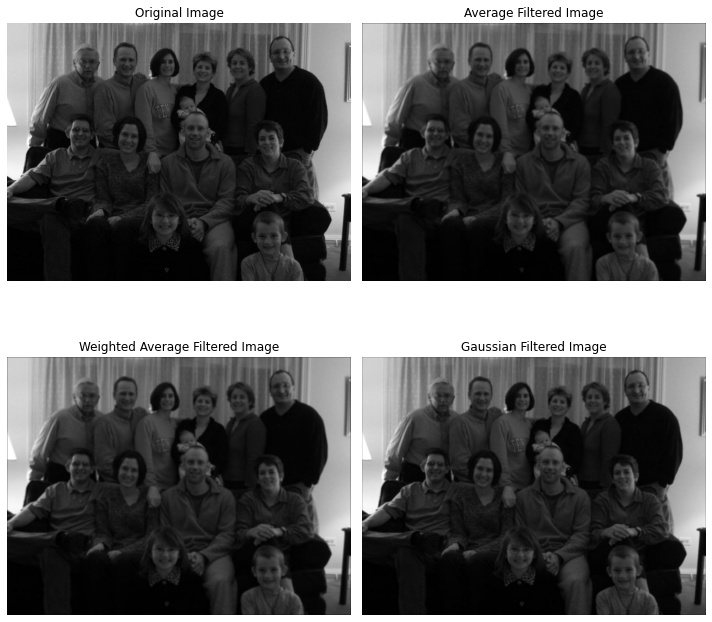

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt  


def average_filter(image, kernel_size):
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.mean(region)
    
    return output_image


def weighted_average_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image


def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) *
                     np.exp(- ((x - (size // 2)) ** 2 + (y - (size // 2)) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def gaussian_filter(image, kernel_size, sigma):
    kernel = gaussian_kernel(kernel_size, sigma)
    
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image


image = cv2.imread('p5.jpg') 


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


avg_filtered_image = average_filter(image_gray, kernel_size=5)
weighted_avg_filtered_image = weighted_average_filter(image_gray, kernel_size=5)
gaussian_filtered_image = gaussian_filter(image_gray, kernel_size=5, sigma=1)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(avg_filtered_image, cmap='gray')
plt.title('Average Filtered Image')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(weighted_avg_filtered_image, cmap='gray')
plt.title('Weighted Average Filtered Image')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')


plt.tight_layout()
plt.show()


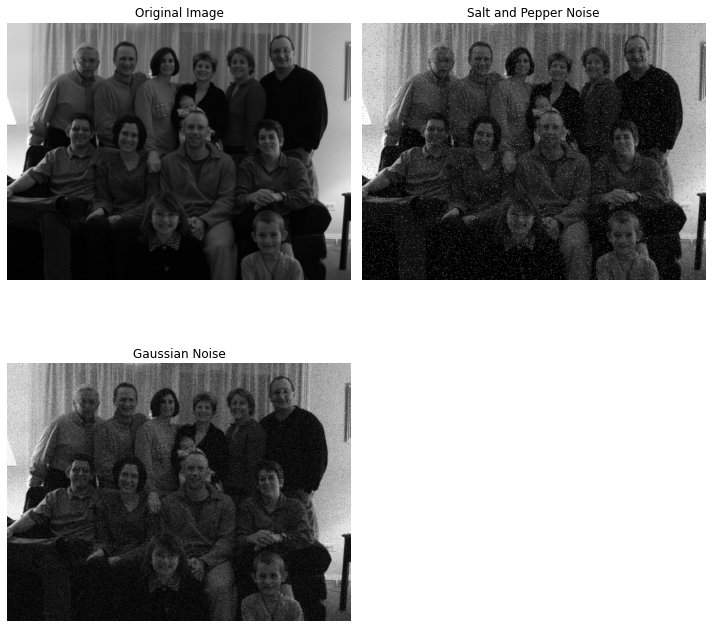

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

   
    salt = int(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i-1, salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255  
    
  
    pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i-1, pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0  

    return noisy_image


def gaussian_noise(image, mean=0, sigma=25):
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gaussian
    
   
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image


image = cv2.imread('p5.jpg') 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


salt_pepper_noisy_image = salt_and_pepper_noise(image_gray, salt_prob=0.02, pepper_prob=0.02)


gaussian_noisy_image = gaussian_noise(image_gray, mean=0, sigma=25)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')


plt.tight_layout()
plt.show()


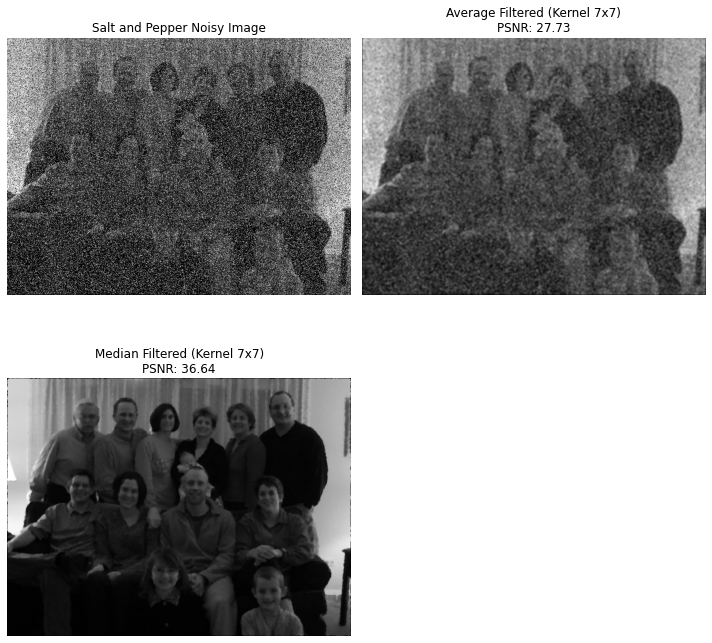

PSNR Values for Average Filter:
Kernel size 3x3: 27.84 dB
Kernel size 5x5: 27.95 dB
Kernel size 7x7: 27.73 dB

PSNR Values for Median Filter:
Kernel size 3x3: 37.45 dB
Kernel size 5x5: 37.66 dB
Kernel size 7x7: 36.64 dB


In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def average_filter(image, kernel_size):
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.mean(region)
    
    return output_image


def median_filter(image, kernel_size):
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.median(region)
    
    return output_image


def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr


image = cv2.imread('p5.jpg')  
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


salt_pepper_noisy_image = salt_and_pepper_noise(image_gray, salt_prob=0.25, pepper_prob=0.25)


kernel_sizes = [3, 5, 7]

avg_psnrs = []
median_psnrs = []


for kernel_size in kernel_sizes:
   
    avg_filtered_image = average_filter(salt_pepper_noisy_image, kernel_size)
    avg_psnr = calculate_psnr(image_gray, avg_filtered_image)
    avg_psnrs.append(avg_psnr)
    
   
    median_filtered_image = median_filter(salt_pepper_noisy_image, kernel_size)
    median_psnr = calculate_psnr(image_gray, median_filtered_image)
    median_psnrs.append(median_psnr)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(avg_filtered_image, cmap='gray')
plt.title(f'Average Filtered (Kernel 7x7)\nPSNR: {avg_psnrs[-1]:.2f}')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title(f'Median Filtered (Kernel 7x7)\nPSNR: {median_psnrs[-1]:.2f}')
plt.axis('off')


plt.tight_layout()
plt.show()


print("PSNR Values for Average Filter:")
for i, kernel_size in enumerate(kernel_sizes):
    print(f"Kernel size {kernel_size}x{kernel_size}: {avg_psnrs[i]:.2f} dB")

print("\nPSNR Values for Median Filter:")
for i, kernel_size in enumerate(kernel_sizes):
    print(f"Kernel size {kernel_size}x{kernel_size}: {median_psnrs[i]:.2f} dB")


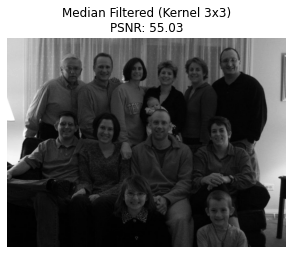

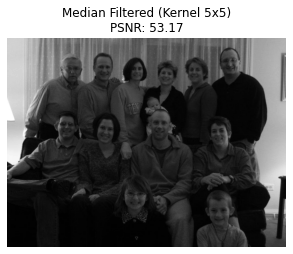

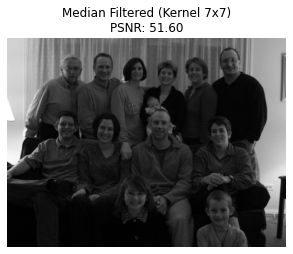

PSNR Values for Median Filtering on Noisy Pixels:
Kernel size 3x3: 55.03 dB
Kernel size 5x5: 53.17 dB
Kernel size 7x7: 51.60 dB


In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def median_filter_on_noisy_pixels(image, kernel_size):
    height, width = image.shape
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    output_image = image.copy()  
    
    for i in range(height):
        for j in range(width):
           
            if image[i, j] == 0 or image[i, j] == 255:
                
                region = padded_image[i:i + kernel_size, j:j + kernel_size]
                
                output_image[i, j] = np.median(region)
    
    return output_image


def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr


image = cv2.imread('p5.jpg') 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


salt_pepper_noisy_image = salt_and_pepper_noise(image_gray, salt_prob=0.02, pepper_prob=0.02)


kernel_sizes = [3, 5, 7]

psnrs = []


for kernel_size in kernel_sizes:
    
    median_filtered_image = median_filter_on_noisy_pixels(salt_pepper_noisy_image, kernel_size)
    psnr = calculate_psnr(image_gray, median_filtered_image)
    psnrs.append(psnr)

   
    plt.figure(figsize=(5, 5))
    plt.imshow(median_filtered_image, cmap='gray')
    plt.title(f'Median Filtered (Kernel {kernel_size}x{kernel_size})\nPSNR: {psnr:.2f}')
    plt.axis('off')
    plt.show()


print("PSNR Values for Median Filtering on Noisy Pixels:")
for i, kernel_size in enumerate(kernel_sizes):
    print(f"Kernel size {kernel_size}x{kernel_size}: {psnrs[i]:.2f} dB")


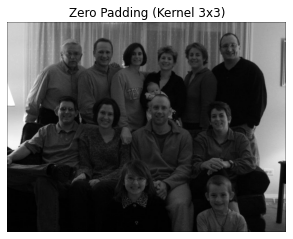

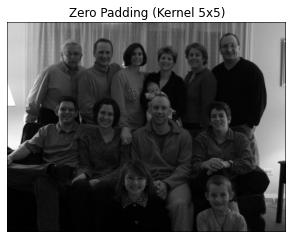

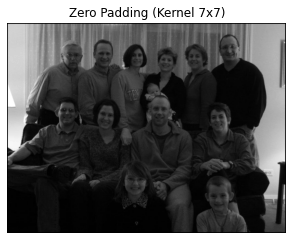

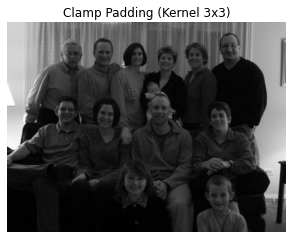

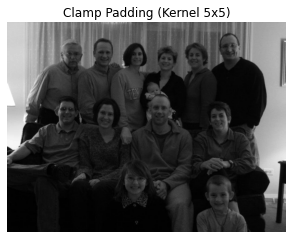

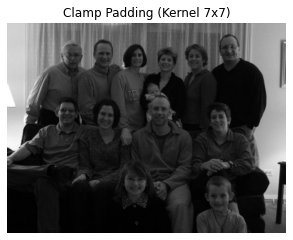

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def apply_padding(image, kernel_size, padding_type='zero'):
    pad = kernel_size // 2
    
    if padding_type == 'zero':
       
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    elif padding_type == 'clamp':
      
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='edge')
    
    return padded_image


image = cv2.imread('p5.jpg')  # Replace with your image file path
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


kernel_sizes = [3, 5, 7]


for padding_type in ['zero', 'clamp']:
    for kernel_size in kernel_sizes:
       
        padded_image = apply_padding(image_gray, kernel_size, padding_type)
        
       
        plt.figure(figsize=(5, 5))
        plt.imshow(padded_image, cmap='gray')
        plt.title(f'{padding_type.capitalize()} Padding (Kernel {kernel_size}x{kernel_size})')
        plt.axis('off')
        plt.show()
